<img style="float: left; width: 260px;" src="images/meanvar.png">
***
# <font color="grey">$\quad$ Lecture 14 - Portfolio optimization</font>
***
$\newcommand{\vct}[1]{\mathbf{#1}}$
$\newcommand{\mtx}[1]{\mathbf{#1}}$
$\newcommand{\e}{\varepsilon}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\minimize}{\text{minimize}\quad}$
$\newcommand{\maximize}{\text{maximize}\quad}$
$\newcommand{\subjto}{\quad\text{subject to}\quad}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\trans}{T}$
$\newcommand{\ip}[2]{\langle {#1}, {#2} \rangle}$
$\newcommand{\zerovct}{\vct{0}}$
$\newcommand{\diff}[1]{\mathrm{d}{#1}}$
$\newcommand{\conv}{\operatorname{conv}}$
$\newcommand{\inter}{{\operatorname{int}}}$

So far we have only dealt with constrained optimization problems where the objective and the constraints are linear. We now turn attention to general problems of the form

\begin{align*}\tag{1}
\begin{split}
 \minimize & f(\vct{x})\\
 \subjto & \vct{g}(\vct{x})\leq \zerovct\\
         & \vct{h}(\vct{x})= \zerovct,
\end{split}
\end{align*}

where $\vct{x}\in \R^n$, $\vct{g}=(g_1,\dots,g_m)^{\trans}$, $\vct{g}=(g_1,\dots,g_{\ell})$, and the inequalities are componentwise. 
The problem above is *convex*, if $f$ and the $g_i$ are convex, and the $h_j$ are linear. We also denote by $\mathrm{dom}(f)$ the *domain* of $f$, which is the set of points $\vct{x}$ where $f$ takes a finite value. The feasible set

\begin{equation*}
 \mathcal{F} = \{\vct{x} \mid g_i(\vct{x})\leq 0, \ h_j(\vct{x})=0, \ 1\leq i\leq m, \ 1\leq j\leq \ell\}
\end{equation*}

for a convex constrained problem is a convex set.

---
### <font color="grey">14.1 Quadratic programming and portfolio optimization</font>
---

The simplest case of non-linear, constrained convex optimization is **quadratic programming**. Quadratic programming problems are of the form

\begin{align*}
  \minimize & \frac{1}{2}\vct{x}^{\trans}\mtx{Q}\vct{x}+\vct{c}^{\trans}\vct{x}\\
  \subjto & \mtx{A}\vct{x}\leq \vct{b},
\end{align*}

with $\mtx{Q}$ symmetric and positive semidefinite.
Note that this problem combines two problems we studied in some detail before: minimizing a quadratic function, and linear constraints. Just as we did for unconstrained minimization and for linear programming, we will derive optimality conditions for such problems. Before studying the theory, we first present an important application: portfolio optimization.

If we invest an amount $x^0$ into a product at period $0$, and at period $1$ (for example, one day) the value is $x^1$, then the \textbf{relative return} is defined as

\begin{equation*}
  r = \frac{x^{1}-x^{0}}{x^{0}}.
\end{equation*}

As we can't predict the future, we usually work with the **expected return** $\mtx{E}[r]=\mu$, which is a statistical estimate of the future return. One naive method of estimating the future return is by taking the average of past returns, but other more sophisticated methods are possible.

In **portfolio optimization**, we have a proportion $x_i$ of our available funds that we want to invest in a stock $i$ (in particular, as $x_i$ measures a proportion, we have $\sum_{i=1}^n x_i = 1$). We may or may not allow $x_i<0$, which would correspond to short-selling or borrowing. Given this allocation, the overall return is $\vct{x}^{\trans}\vct{r}$, where $\vct{x}=(x_1,\dots,x_n)^{\trans}$ and $\vct{r}=(r_1,\dots,r_n)^{\trans}$ is the vector of (relative) returns.
If $\vct{\mu}=\mtx{E}[\vct{r}]$ denotes the vector of expected returns, then the total expected return is 

\begin{equation*}
\mu = \vct{x}^{\trans}\vct{\mu}=\sum_{i=1}^n x_i\mu_i.
\end{equation*} 

The **risk** is an investment is measured in terms of the **variance** of the returns $r=\vct{x}^{\trans}\vct{r}$. Let $\mtx{\Sigma}$ denote the \textbf{covariance matrix}, where the $(i,j)$-th entry is $\mathrm{Cov}(r_i,r_j) = \mtx{E}[(r_i-\mu_i)(r_j-\mu_j)]$. The $(i,j)$-th entry measures how much products $i$ and $j$ are correlated. The \textbf{variance} of the returns $r$ is then the quadratic function

 \begin{equation*}
   \vct{x}^{\trans}\Sigma\vct{x}.
 \end{equation*} 
  
A portfolio optimization problem either seeks to maximize the return while bounding the risk,

\begin{align*}
  \maximize & \vct{x}^{\trans}\vct{\mu}\\
  \subjto & \vct{x}^{\trans}\mtx{\Sigma}\vct{x}\leq \sigma,\\
  & \sum_{i=1}^n x_i=1\\
  & x_i\geq 0,
 \end{align*}

or minimize the risk given a certain target return $\mu$,

\begin{align*}
 \minimize & \vct{x}^{\trans}\mtx{\Sigma}\vct{x}\\
 \subjto & \vct{x}^{\trans}\vct{\mu} = \mu\\
 & \sum_{i=1}^n x_i = 1\\
 & x_i\geq 0.
\end{align*}

Both of these problems are convex optimization problems. The constraints $x_i\geq 0$ mean that we are not allowed to short-sell; when dealing with futures or options, or if we are a large institutional investor, we may drop these constraints. As we will see later, dropping the inequality constraints from the second formulation allows the problem to be solved in closed form.

A third form of the portfolio optimization problem is to combine the expected return and the risk into a single objective function, as follows:

\begin{align*}
 \maximize & \vct{\mu}^{\trans}\vct{x} - \gamma \vct{x}^{\trans}\mtx{\Sigma}\vct{x}\\
 \subjto & \sum_{i=1}^n x_i = 1\\
 & x_i\geq 0.
\end{align*}

Note that this is a convex quadratic problem: we can transform it into a minimization problem with the matrix $\mtx{\Sigma}$ by changing the sign.
The parameter $\gamma$ is called a **risk aversion parameter**; it adjusts the level of risk we are willing to take. If $\gamma=0$, then the quadratic term does not feature in the objective and we just aim to maximize the expected return. If $\gamma$ is big, then the risk term weighs heavily on the objective function, and the optimal value will like be one where $\vct{x}^{\trans}\mtx{\Sigma}\vct{x}$ is small. By varying the value of $\gamma$, we get different expected return / risk (variance) trade-offs. The following code computes this trade-off curve for a portfolio of $10$ stock from the FT100 index. The mean and covariance where computing by averaging over the past 60 trading days (3 months). The $x$-axis is the \textbf{standard deviation}, which is given as the square root of the variance (risk). 

In [1]:
from datetime import datetime, date
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import matplotlib.pyplot as plt
from cvxpy import *

In [2]:
# Set date range
START = datetime(2016,1,1)
END = date.today()
TICKER = ['ADN', 'AZN', 'EZJ', 'GSK', 'ITV', 'LSE', 'TSCO', 'PSON', 'PRU', 'DGE']

In [3]:
# Load daily adjusted close prices into dataframe
mydata = data.DataReader('TSCO', "yahoo", START, END)
dates = mydata.index
df = pd.DataFrame(index=dates, columns=TICKER)
for x in TICKER:
    mydata = data.DataReader(x, "yahoo", START, END)
    df.loc[:,x] = mydata['Adj Close']
df = df.dropna()
df.head(3)

,ADN,AZN,EZJ,GSK,ITV,LSE,TSCO,PSON,PRU,DGE
Date,,,,,,,,,,
2016-01-04,2.41197,31.926706,84.900002,37.813187,0.4,0.002,82.800593,0.016,77.020534,1036.770020
2016-01-05,2.41197,32.404650,86.620003,38.028194,0.4,0.001,82.741275,0.014,76.760072,1044.900024
2016-01-06,2.41197,31.869351,83.209999,37.616878,0.4,0.002,81.604310,0.014,74.203653,1031.810059


In [4]:
# Compute returns
price_matrix = df.values
returns = (price_matrix[1:]-price_matrix[0:-1])/price_matrix[0:-1]

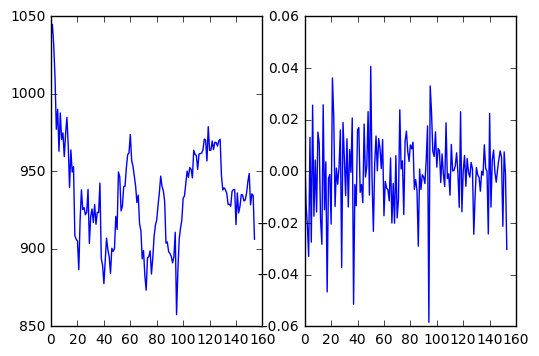

In [5]:
# Plot some stock prices and returns
% matplotlib inline
fig, ax = plt.subplots(1,2)
ax[0].plot(price_matrix[:,-1])
ax[1].plot(returns[:,-1])
plt.show()

In [6]:
# Estimate mean vector and covariance matrix based on last 20 prices
mu = np.mean(returns[-60:,:], axis=0)
Sigma = np.cov(returns[-60:,:].T)
n = 10

In [7]:
# Long only portfolio optimization in Lagrangian form
x = Variable(n)
gamma = Parameter(sign='positive')
ret = mu.T*x
risk = quad_form(x, Sigma)
prob = Problem(Maximize(ret - gamma*risk), 
               [sum_entries(x) == 1, 
                x >= 0])

In [8]:
# Compute trade-off curve.
SAMPLES = 1000
risk_data = np.zeros(SAMPLES)
ret_data = np.zeros(SAMPLES)
gamma_vals = np.logspace(-2, 3, num=SAMPLES)
for i in range(SAMPLES):
    gamma.value = gamma_vals[i]
    prob.solve()
    risk_data[i] = sqrt(risk).value
    ret_data[i] = ret.value

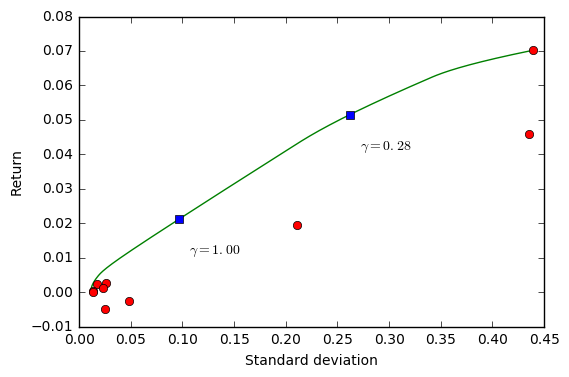

In [9]:
# Plot long only trade-off curve.
markers_on = [290, 400]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, 'g-')
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], 'bs')
    ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], xy=(risk_data[marker]+0.01, ret_data[marker]-0.01))
for i in range(n):
    plt.plot(sqrt(Sigma[i,i]).value, mu[i], 'ro')
plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.show()

The red dots represent the standard deviation and expected return of the individual stocks. The two blue dots indicate the standard deviation and expected return of the portfolio for two values of $\gamma$. Which value of $\gamma$ we go for depends on how much risk we are willing to take: if we are risk-averse, we may prefer the $\gamma=1$ value to the $\gamma=0.028$ value, at the expense of smaller expected returns.

In practical applications there are a lot of other factors to be considered, such as whether the estimation procedure for the mean and covariance makes sense. In addition, it is often common to add terms that account for **transaction costs** into the objective funtion.